# XUV Data

## Setting up the Notebook

In [37]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

class XUVImage:
    def __init__(self, filename, time):
        self.time=time
        self.im=plt.imread(filename)
        #grayscale
        self.im=self.im.sum(2)
    def rotate(self):
        self.im=np.rot90(self.im)
    def plot_im(self):
        self.fig_im, self.ax_im=plt.subplots()
        self.plot_im=self.ax_im.imshow(self.im, cmap=plt.cm.afmhot)
    def axial_sum(self):
        self.asum=self.im.sum(0)
    def plot_sum_pixel(self):
        self.fig_s, self.ax_s=plt.subplots()
        self.plot_s=self.ax_s.plot(self.asum)
    def set_scale(self):
        self.scale=(self.c2-self.c1)/(16*np.cos(np.pi/8))
        self.centre_pixel=(self.c1+self.c2)/2
        self.r=(np.arange(self.asum.size)-self.centre_pixel)/self.scale
    def plot_sum_radius(self):
        self.fig_s, self.ax_s=plt.subplots()
        self.plot_s=self.ax_s.plot(self.r,self.asum)
    def find_FWHM(self, peak_loc_px):
        peak_height=self.asum[peak_loc_px]
        HM=peak_height/2.0
        upper_chunk=self.asum[peak_loc_px:]
        lower_chunk=self.asum[:peak_loc_px][::-1]
        high_ind=np.where(upper_chunk<HM)[0][0]+peak_loc_px
        low_ind=peak_loc_px-np.where(lower_chunk<HM)[0][0]

        FWHM=high_ind-low_ind
        return FWHM
        

In [38]:
cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns


## Frame 1, 160 ns

<IPython.core.display.Javascript object>


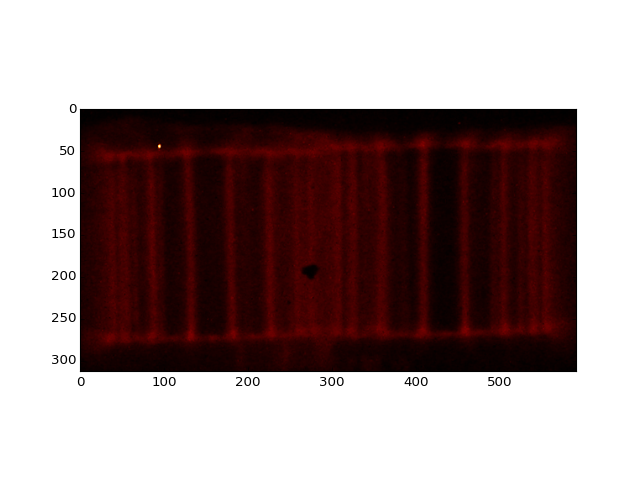

<IPython.core.display.Javascript object>


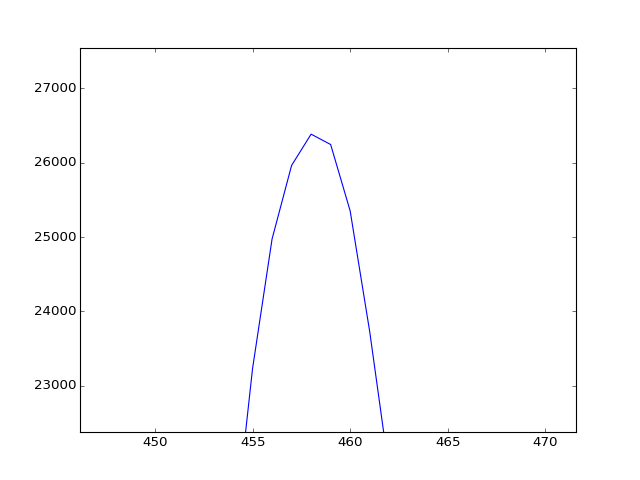

In [39]:
F1=XUVImage("s1026_15 XUV A 160ns.jpg", 160)
#F1.rotate()
F1.axial_sum()
F1.plot_im()
F1.plot_sum_pixel()

In [42]:
F1.find_FWHM(458)

21

<IPython.core.display.Javascript object>


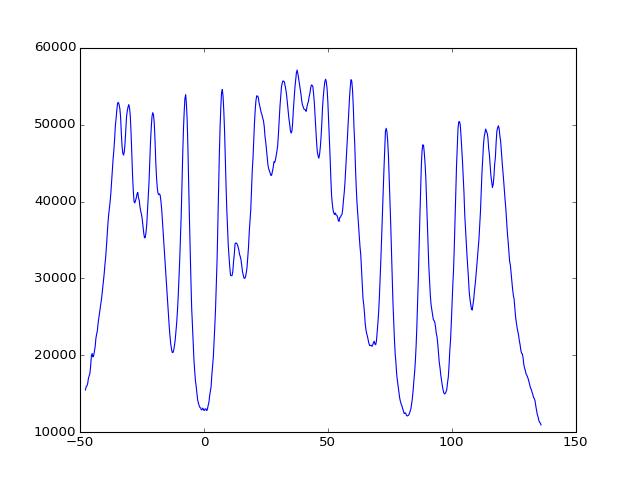

In [6]:
#how many mm per pixel? We know the outer cores are 16/cos(pi/8) apart
F1.c1=134
F1.c2=183
F1.set_scale()
F1.plot_sum_radius()

## Frame 2, 190 ns

<IPython.core.display.Javascript object>


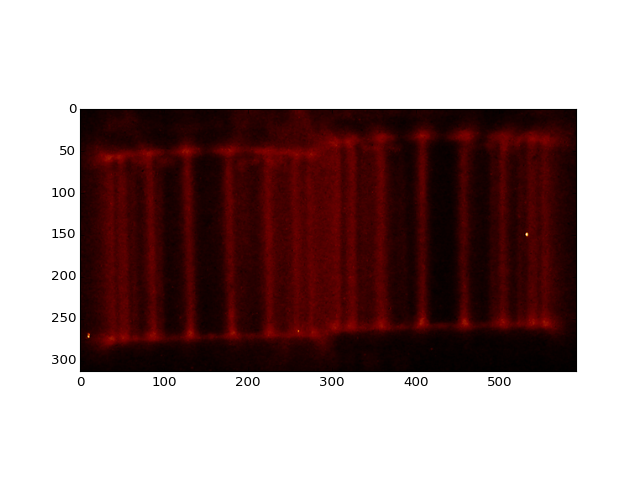

<IPython.core.display.Javascript object>


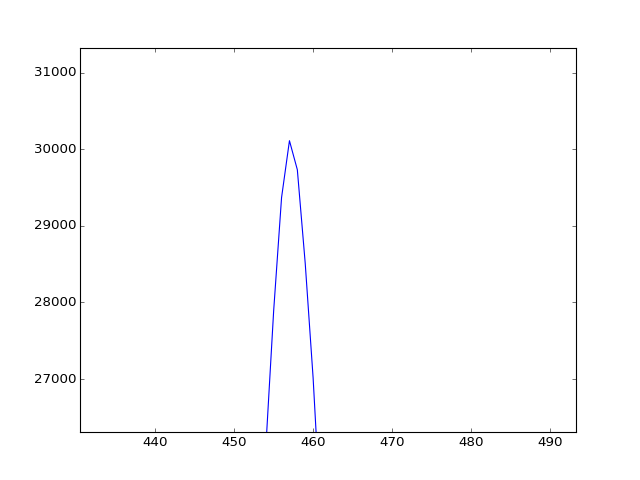

In [43]:
F2=XUVImage("s1026_15 XUV A 190ns.jpg", 190)
F2.axial_sum()
F2.plot_im()
F2.plot_sum_pixel()

In [46]:
F2.find_FWHM(458)

18

<IPython.core.display.Javascript object>


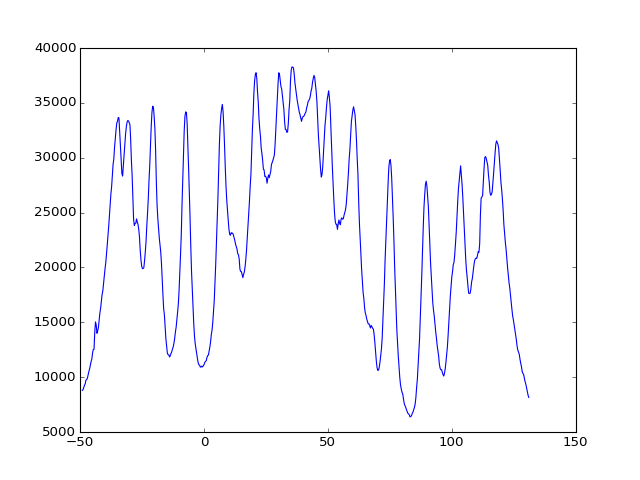

In [8]:
#how many mm per pixel? We know the outer cores are 16/cos(pi/8) apart
F2.c1=141
F2.c2=191
F2.set_scale()
F2.plot_sum_radius()

## Frame 3: 220 ns

<IPython.core.display.Javascript object>


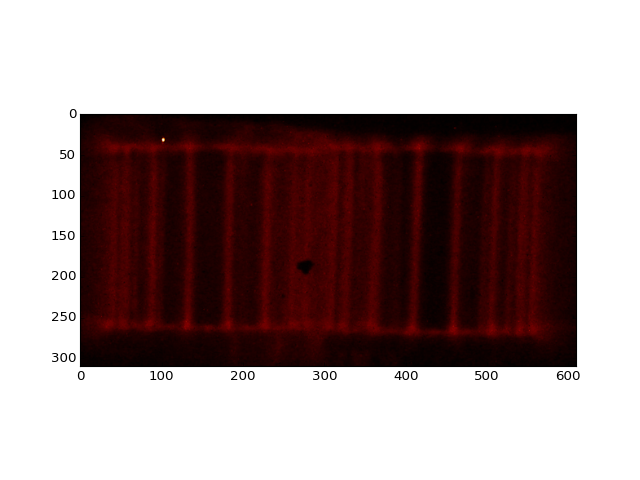

<IPython.core.display.Javascript object>


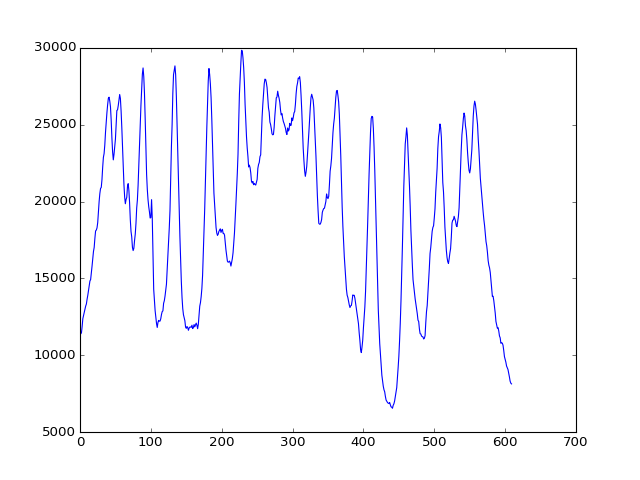

In [53]:
F3=XUVImage("s1026_15 XUV A 220ns.jpg", 220)
F3.axial_sum()
F3.plot_im()
F3.plot_sum_pixel()

In [54]:
F3.find_FWHM(461)

24

## Frame 4: 250 ns

<IPython.core.display.Javascript object>


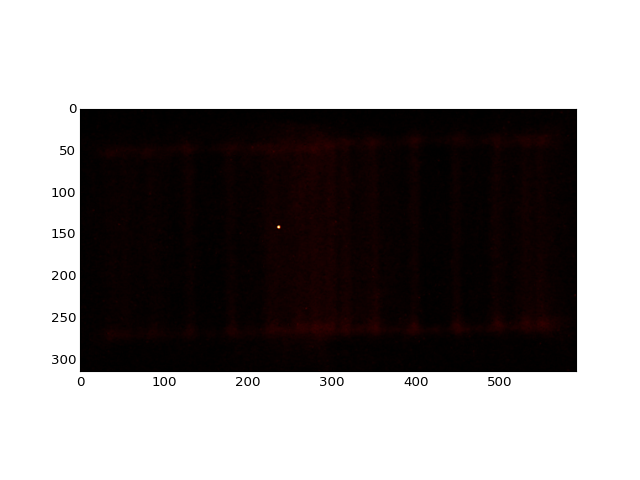

<IPython.core.display.Javascript object>


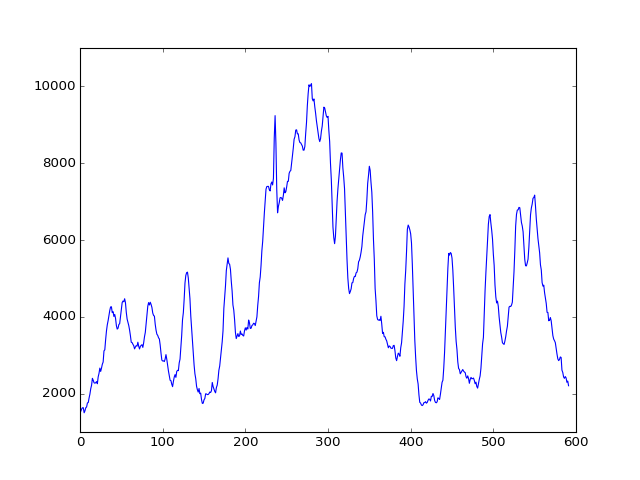

In [55]:
F4=XUVImage("s1026_15 XUV A 250ns.jpg", 220)
F4.axial_sum()
F4.plot_im()
F4.plot_sum_pixel()

In [59]:
F4.find_FWHM(448)

16

## Comparison

<IPython.core.display.Javascript object>


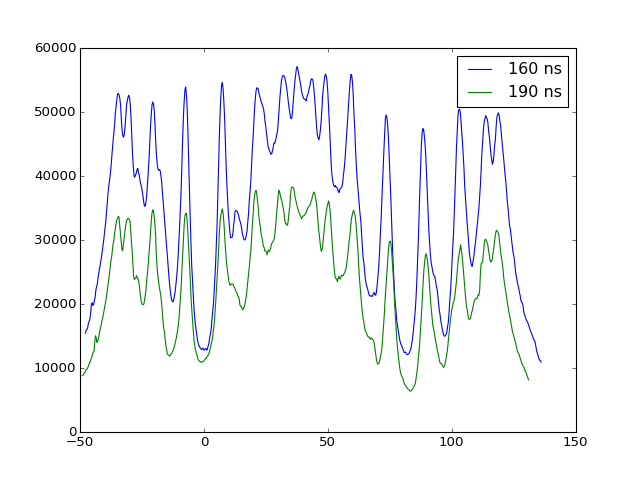

In [10]:
fig_comp, ax_comp=plt.subplots()
plot_F1=ax_comp.plot(F1.r, F1.asum, label=str(F1.time)+' ns')
plot_F2=ax_comp.plot(F2.r, F2.asum, label=str(F2.time)+' ns')
ax_comp.legend(loc=0)

In [82]:
#lh peaks
F1.lpeak=-6.71
F2.lpeak=-4.47
#velocity in cm/s
velocity=(F2.lpeak-F1.lpeak)*0.1/((F2.time-F1.time)*10**-9)
print round(velocity)

7466667.0


In [83]:

#rh peaks
F1.rpeak=6.87
F2.rpeak=4.67
#velocity in cm/s
velocity=(F2.rpeak-F1.rpeak)*0.1/((F2.time-F1.time)*10**-9)
print round(velocity)

-7333333.0
